# HEART ATTACK PREDICTION USING MACHINE LEARNING 



In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

df=pd.read_csv("C:/Users/Dell/Desktop/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# now to pick the first five data 

In [177]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# now we find the shape of the data no of rows and columns

In [178]:

df.shape

(303, 14)

# now we find the information about the data 

In [179]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# describe the data

In [180]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# this is used to find the null values 

In [181]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

df1=pd.read_csv("C:/Users/Dell/Desktop/heart.csv")
df1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Now we are replacing the o and 1 of the sex by F and M

In [183]:
df.sex.replace([0,1],['F','M'],inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,M,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,F,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,M,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,M,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,M,2,150,168,0,1,174,0,1.6,2,0,2,1


# Replacing the 0 and 1 with P and N

In [184]:

df1.target.replace([0,1],['N','P'],inplace = True)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,P
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,P
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,P
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,P
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,P
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,P
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,P
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,P
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,P
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,P


# Finding the number of male and Female 

In [185]:
print("the total number of male are:",df.sex.value_counts().M)
print("the total number of female are:",df.sex.value_counts().F)

the total number of male are: 207
the total number of female are: 96


In [206]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

# Finding the number of Male and Female 

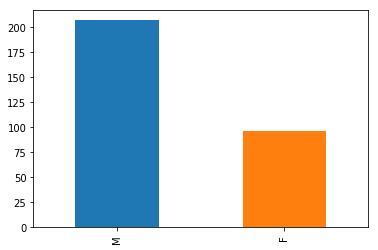

In [186]:
binary = df.sex.value_counts()
binary.plot.bar()

# Finding the total number of persons having heart disease or not

In [187]:
print("the total number of PERSONS HAVING HEART DISEASE are:",df1.target.value_counts().P)
print("the total number of PERSONS NOT HAVING HEART DISEASE are:",df1.target.value_counts().N)

the total number of PERSONS HAVING HEART DISEASE are: 165
the total number of PERSONS NOT HAVING HEART DISEASE are: 138


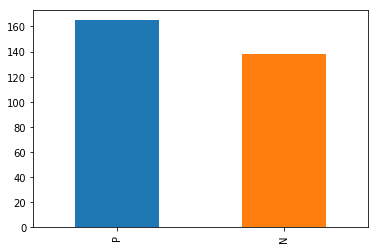

In [188]:
total = df1.target.value_counts()
total.plot.bar()

In [189]:
round(df1.target.value_counts()*100/len(df.axes[0]),2)                                                                                                                           

P    54.46
N    45.54
Name: target, dtype: float64

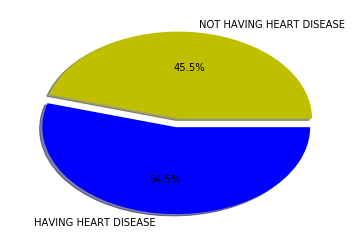

In [190]:
import matplotlib.pyplot as plt 
values = [165,138]
lables=['HAVING HEART DISEASE','NOT HAVING HEART DISEASE']
colors=['b','y']
explode=(0.1,0)
plt.pie(values,colors=colors,labels=lables,explode=explode,autopct='%1.1f%%',counterclock=False,shadow=True)
plt.show()

In [191]:
from sklearn.cross_validation import train_test_split
Train,Test = train_test_split(df1,test_size = 0.8,random_state=176)

In [192]:
#keep target and independent variable into dirferent variable
Train_IndepentVars = Train.values[:,3:5]
Train_TargetVars = Train.values[:,13]

# Applying Random forest tree classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_model = RandomForestClassifier(max_depth = 10,n_estimators = 10)

In [194]:
rf_model.fit(Train_IndepentVars,Train_TargetVars)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [195]:
prediction = rf_model.predict(Train_IndepentVars)
prediction

array(['N', 'N', 'P', 'N', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P',
       'P', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'P',
       'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'P',
       'P', 'N', 'N', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'P', 'P', 'P',
       'P', 'N', 'N', 'P', 'N', 'P', 'N', 'N'], dtype=object)

In [196]:
from sklearn.metrics import confusion_matrix
print("confusion matirx",confusion_matrix(Train_TargetVars,prediction))

confusion matirx [[33  0]
 [ 2 25]]


# Finding the accuracy

In [197]:
from sklearn.metrics import accuracy_score
print("accuracy score:",accuracy_score(Train_TargetVars,prediction))

accuracy score: 0.9666666666666667


# finding the importance of attribute

In [198]:
importance = rf_model.feature_importances_
importance = pd.DataFrame(importance,index = Train.columns[3:5],columns = ["importance"])
importance

,importance
trestbps,0.432778
chol,0.567222
